In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset and use the column names 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' and 'class'

In [2]:
df = pd.read_csv('iris_dirty.txt', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Explore the data

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [4]:
df.info()
# petal_width dtype is wrong, and there is a null value in sepal_width. There might be duplicates.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [5]:
df.describe()
# sepal_length seems to have a huge outlier.

,sepal_length,sepal_width,petal_length
count,151.000000,150.000000,151.000000
mean,6.196689,3.057333,3.764901
std,4.324325,0.432776,1.760197
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,58.000000,4.400000,6.900000


In [6]:
df['class'].unique()
# There's a typo in 'Iris-setsoa', there should only be 4 labels.

array(['Iris-setosa', 'Iris-setsoa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

# Data cleaning & feature engineering

## Dealing with missing values / duplicates

In [7]:
df['sepal_width'] = df['sepal_width'].fillna((df['sepal_width'].mean()))

In [8]:
df.shape

(151, 5)

In [9]:
df = df.drop_duplicates()
df.shape

(148, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  148 non-null    float64
 3   petal_width   148 non-null    object 
 4   class         148 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.9+ KB


## Standardizing label values

In [11]:
df['class'].unique()

array(['Iris-setosa', 'Iris-setsoa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [12]:
df['class'] = df['class'].replace('Iris-setsoa', 'Iris-setosa')

In [13]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Dealing with data types and magnitudes

In [14]:
df['petal_width'] = df['petal_width'].str.replace(r"[a-zA-Z]", '').astype(float)/10


/var/folders/yw/kfrh__c16y32fwr4ddxqhybm0000gp/T/ipykernel_32373/3447242766.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['petal_width'] = df['petal_width'].str.replace(r"[a-zA-Z]", '').astype(float)/10


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  148 non-null    float64
 3   petal_width   148 non-null    float64
 4   class         148 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Dealing with outliers

In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,148.000000,148.000000,148.000000,148.000000
mean,6.208784,3.055793,3.789189,1.213514
std,4.365089,0.435520,1.756470,0.757426
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


/Applications/anaconda3/envs/bootcamp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


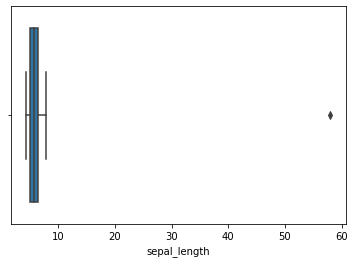

In [18]:
sns.boxplot(df['sepal_length']);

There seems to be only one outlier, and since its value is 58 and the mean of that column is 6.2, I assume it's just a typo. Therefore, I'll divide the value by 10.

In [19]:
df['sepal_length'].replace(58, 5.8, inplace=True)

In [20]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,148.000000,148.000000,148.000000,148.000000
mean,5.856081,3.055793,3.789189,1.213514
std,0.826288,0.435520,1.756470,0.757426
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/Applications/anaconda3/envs/bootcamp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


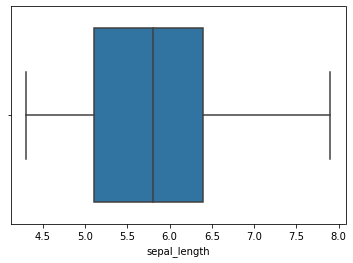

In [21]:
sns.boxplot(df['sepal_length']);

# Multicollinearity

In [22]:
df_num = df.select_dtypes(include=np.number)
correlations_matrix = df_num.corr()
correlations_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.869281,0.814322
sepal_width,-0.109321,1.000000,-0.424049,-0.360509
petal_length,0.869281,-0.424049,1.000000,0.961975
petal_width,0.814322,-0.360509,0.961975,1.000000


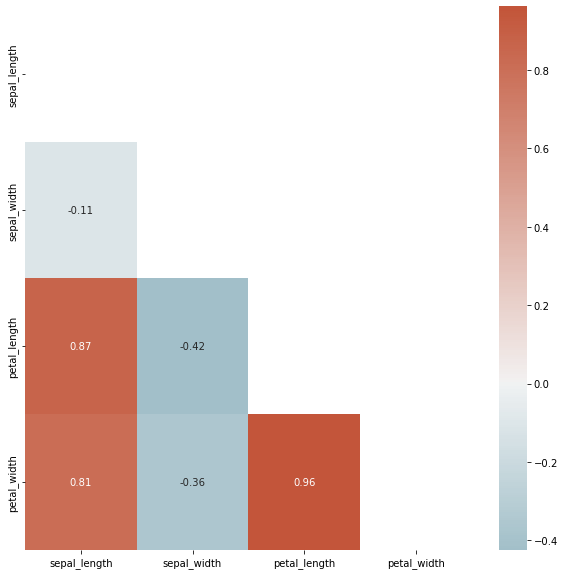

In [23]:
mask=np.zeros_like(correlations_matrix) # this numpy mask eliminates the repeated correlations in the matrix.
mask[np.triu_indices_from(mask)]=True
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(correlations_matrix, mask=mask, annot=True, center=0, 
               cmap=sns.diverging_palette(220, 20, as_cmap=True));

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame()
vif_data["feature"] = df_num.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_num.values, i)
                          for i in range(len(df_num.columns))]
  
print(vif_data.sort_values(by='VIF', ascending=False))

        feature         VIF
0  sepal_length  263.211302
2  petal_length  173.427742
1   sepal_width   96.156738
3   petal_width   55.769860


Numerical features are highly correlated amongst them, but since we have only four of them, we'll provisionally keep them and see how the modeling goes.

# Logistic Regression model

In [25]:
from sklearn.model_selection import train_test_split

y = df['class']
X = df_num

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [26]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=400).fit(X_train, y_train)

In [27]:
y_preds = LR.predict(X_test)

## Accuracy score

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.9333333333333333

## Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_preds)

array([[14,  0,  0],
       [ 0, 15,  2],
       [ 0,  1, 13]])

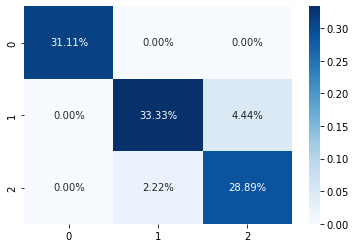

In [30]:
cmx = confusion_matrix(y_test, y_preds)
sns.heatmap(cmx/np.sum(cmx), annot=True, fmt='.2%', cmap='Blues');

# Pairwise scatterplots with the predicted categories

In [31]:
all_preds = LR.predict(df_num)

In [32]:
df['preds'] = all_preds

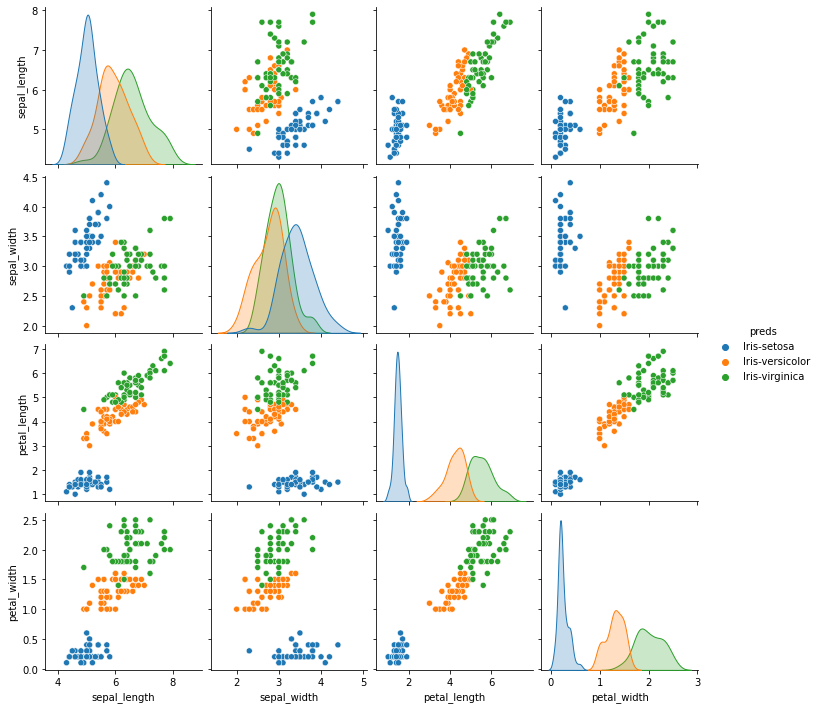

In [33]:
sns.pairplot(df, hue="preds")